In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sn

from gradientDescentProblem2 import gradientDescent


#reading from Database uding pandas    
df = pd.read_csv ('data2_house_data.csv')

#Draw data based on coordinates
x=df.lat
y=df.long

#plt.figure(figsize=(5, 5), dpi=80)
plt.plot(x,y,'ob')
plt.title('Coodinates of data')
plt.savefig('Images\HomesCoordinate.jpg')
#plt.show()
plt.close()

## Map 
Coordinates |
- |
![alt](Images\HomesCoordinate.jpg) 


# $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ Part B: Correlation Matrix Heatmap

In [4]:
#Separate related features from output price

df = pd.read_csv ('data2_house_data.csv')
df_features=pd.read_csv ('data2_house_data.csv')
price = df_features.pop('price')
date = df_features.pop('date')
id = df_features.pop('id')


#this corr map is used to find the correlation between the attributes and the pricing so as to 
#get an idea about the relationship between them.


plt.figure(figsize=(12, 10), dpi=80)
sn.heatmap(df.corr(),annot = True)
#sn.heatmap(corrMatrix, annot=True)
plt.title('Correlation Matrix Heatmap')
plt.savefig('Images\CorrelationMatrixHeatmap.jpg')
#plt.show()
plt.close()

#Separate related features from irrelevant features
df_relevant=pd.read_csv ('data2_house_data.csv')
price = df_relevant.pop('price')
date = df_relevant.pop('date')
id = df_relevant.pop('id')

#irrelevant features obtained from feature selection
condition = df_relevant.pop('condition')
long = df_relevant.pop('long')
#df_relevant = df_features.iloc[:,2:20]

corrMatrix_relevant = df_relevant.corr()

plt.figure(figsize=(12,10), dpi=80)
sn.heatmap(corrMatrix_relevant, annot=True)
plt.title('Correlation Matrix Heatmap(after removing irrelevant features)')
plt.savefig('Images\CorrelationMatrixHeatmapAfterRremovingIrrelevantFeatures.jpg')
#plt.show()
plt.close()


#First thing I will check is the null values: I will use .isna() for that purpose.
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Correlation Matrix Heatmap 
###  Befor featue selection 
Befor featue selection |
- |
![alt](Images\CorrelationMatrixHeatmap.jpg) 


# # Conclusion 1
 <span style="color:blue;  font-size: 1.5em;">as can be seen, based on correlation between price as an output and features price,date and id as irrelevent features can be removed from features 
also as the second part of feature selection we find out  the most effective features are ***"sqft_living"*** and ***"grade"*** 
and the least effective featue are ***"condition"*** and ***"long"***
this determinations are based this rule that correlation should be between 0.5 and .9 for acceptable features</span>



## Correlation Matrix Heatmap 
###  After featue selection 

After featue selection |
- |
![alt](Images\CorrelationMatrixHeatmapAfterRremovingIrrelevantFeatures.jpg) 


In [68]:
#number of all features
n=18



#number of all data
all_data = int(df_features.size/n)
# number of traning data
m= int(all_data*.8)
# number of testing data
s= int(all_data*.2)

#all feature data
x_all = np.array(df_features.iloc[:,0:19].T)
y_all = np.array(price.T)

#traning set
x_train = np.array(df_features.iloc[0:m,0:19].T)
y_train = np.array(price[0:m].T)

#testing set
x_test = np.array(df_features.iloc[m:all_data,0:19].T)
y_test = np.array(price[m:all_data].T)


hyperParameter = 3
x_train_3=np.r_[ x_train , np.power(x_train,2)  , np.power(x_train,3) ].T

x_test_3=np.r_[ x_test , np.power(x_test,2)  , np.power(x_test,3) ].T
x_all_3 = np.r_[x_all , np.power(x_all,2)  , np.power(x_all,3) ].T



error_train_MSE = []
error_test_MSE = []
gradient_MSE_set = []



#theta_MSE = gradientDescent(x_train_3, y_train,x_test_3,y_test,theta_MSE,alpha, m,s, numIterations
#                            ,error_train_MSE ,error_test_MSE,gradient_MSE_set)

alpha = 1e-10
theta_MSE = 1*np.zeros(n*1)

numIterations=100000
x=x_train.T
y=y_train
x_test=x_test.T
xTrans = x.transpose()

for i in range(0, numIterations):
    
    #print(i)
    hypothesis_MSE = np.dot(x, theta_MSE)
    
    loss_MSE = hypothesis_MSE - y

    # avg cost per example (the 2 in 2*m doesn't really matter here.
    # But to be consistent with the gradient, I include it)
    
    cost_MSE = np.sum(loss_MSE ** 2) / (2 * m) #MSE
    
    #print("Iteration %d | Cost: %f" % (i, cost))
    # avg gradient per example
    gradient_MSE = np.dot(xTrans, loss_MSE) / m
    # update
    theta_MSE = theta_MSE - alpha * gradient_MSE
    
    error_train_MSE.append(cost_MSE)
    
    gradient_MSE_set.append(gradient_MSE)
    
    #calculate Test Error    
    hypothesis_test_MSE = np.dot(x_test, theta_MSE)

    loss_test_MSE = hypothesis_test_MSE - y_test

    # avg cost per example (the 2 in 2*m doesn't really matter here.
    # But to be consistent with the gradient, I include it)
    
    cost_test_MSE = np.sum(loss_test_MSE ** 2) / (2 * s) #MSE

    error_test_MSE.append(cost_test_MSE)
    

In [111]:
hypothesis_MSE = np.dot(x_all.T, theta_MSE)

plt.figure(figsize=(12, 10), dpi=80)
t=range(0,y_all.size)
l1,=plt.plot(t,y_all,'ob')
l2,=plt.plot(t,hypothesis_MSE,'*r')
plt.title('Curve Fitting')
plt.legend((l1,l2),('Raw data','Curve Fitting'), loc = 'best')
plt.savefig('Images\CurveFitting.jpg')
#plt.show()
plt.close()


# $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ Before Feature Selection 

before Feature Selection  | 
 - | 
 ![alt](Images\CurveFitting.jpg) |

In [113]:
plt.figure(figsize=(7,7), dpi=80)
t=range(0,numIterations)
l1,=plt.plot(t,error_train_MSE,'r-.')
l2,=plt.plot(t,error_test_MSE,'b-.')
plt.title('MSE error(Iterations={})'.format(numIterations))
plt.legend((l1,l2),('training error','Testing error'), loc = 'best')
plt.savefig('Images\MSEerror_{}.jpg'.format(numIterations))
#plt.show()
plt.close()


Before Feature Selection  | 
 - | 
 ![alt](Images\MSEerror_100000.jpg) |

In [100]:
#number of selected features
n=16
#df_relevant.iloc[m:m+1,0:16]
#number of all data
all_data = int(df_relevant.size/n)
# number of traning data
m= int(all_data*.8)
# number of testing data
s= int(all_data*.2)

#all feature data
x_all = np.array(df_relevant.iloc[:,0:18].T)
y_all = np.array(price.T)

#traning set
x_train = np.array(df_relevant.iloc[0:m,0:18].T)
y_train = np.array(price[0:m].T)

#testing set
x_test = np.array(df_relevant.iloc[m:all_data,0:18].T)
y_test = np.array(price[m:all_data].T)


error_train_MSE = []
error_test_MSE = []
gradient_MSE_set = []

alpha = 1e-10
theta_MSE = 1*np.zeros(n*1)

numIterations=100000
x=x_train.T
y=y_train
x_test=x_test.T
xTrans = x.transpose()

for i in range(0, 100000):
    
    #print(i)
    hypothesis_MSE = np.dot(x, theta_MSE)
    
    loss_MSE = hypothesis_MSE - y

    # avg cost per example (the 2 in 2*m doesn't really matter here.
    # But to be consistent with the gradient, I include it)
    
    cost_MSE = np.sum(loss_MSE ** 2) / (2 * m) #MSE
    
    #print("Iteration %d | Cost: %f" % (i, cost))
    # avg gradient per example
    gradient_MSE = np.dot(xTrans, loss_MSE) / m
    # update
    theta_MSE = theta_MSE - alpha * gradient_MSE
    
    error_train_MSE.append(cost_MSE)
    
    gradient_MSE_set.append(gradient_MSE)
    
    #calculate Test Error    
    hypothesis_test_MSE = np.dot(x_test, theta_MSE)

    loss_test_MSE = hypothesis_test_MSE - y_test

    # avg cost per example (the 2 in 2*m doesn't really matter here.
    # But to be consistent with the gradient, I include it)
    
    cost_test_MSE = np.sum(loss_test_MSE ** 2) / (2 * s) #MSE

    error_test_MSE.append(cost_test_MSE)
    


In [115]:
hypothesis_MSE = np.dot(x_all.T, theta_MSE)

plt.figure(figsize=(12,10), dpi=80)
t=range(0,y_all.size)
l1,=plt.plot(t,y_all,'ob')
l2,=plt.plot(t,hypothesis_MSE,'*r')
plt.title('Curve Fitting ( After Feature Selection )')
plt.legend((l1,l2),('Raw data','Curve Fitting'), loc = 'best')
plt.savefig('Images\CurveFittingAfterFeatureSelection.jpg')
#plt.show()
plt.close()


# $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ After Feature Selection 

After Feature Selection  | 
 - | 
 ![alt](Images\CurveFitting.jpg) |

In [116]:
plt.figure(figsize=(7,7), dpi=80)
t=range(0,numIterations)
l1,=plt.plot(t,error_train_MSE,'r-.')
l2,=plt.plot(t,error_test_MSE,'b-.')
plt.title('MSE error afterFeature selection (Iterations={})'.format(numIterations))
plt.legend((l1,l2),('training error','Testing error'), loc = 'best')
plt.savefig('Images\MSEerrorAfterFeatureSelection_{}.jpg'.format(numIterations))
#plt.show()
plt.close()


After Feature Selection  | 
 - | 
 ![alt](Images\MSEerrorAfterFeatureSelection_100000.jpg) |

# $\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ Part B: Normal Equation

In [17]:
#number of all features
n=18

#number of all data
all_data = int(df_features.size/n)
# number of traning data
m= int(all_data*.8)
# number of testing data
s= int(all_data*.2)

#all feature data
x_all = np.array(df_features.iloc[:,0:19])
y_all = np.array(price.T)

#traning set
x_train = np.array(df_features.iloc[0:m,0:19])
y_train = np.array(price[0:m])

#testing set
x_test = np.array(df_features.iloc[m:all_data,0:19].T)
y_test = np.array(price[m:all_data].T)

theta = np.linalg.inv( x_train.T.dot(x_train)  ).dot(x_train.T).dot(y_train)


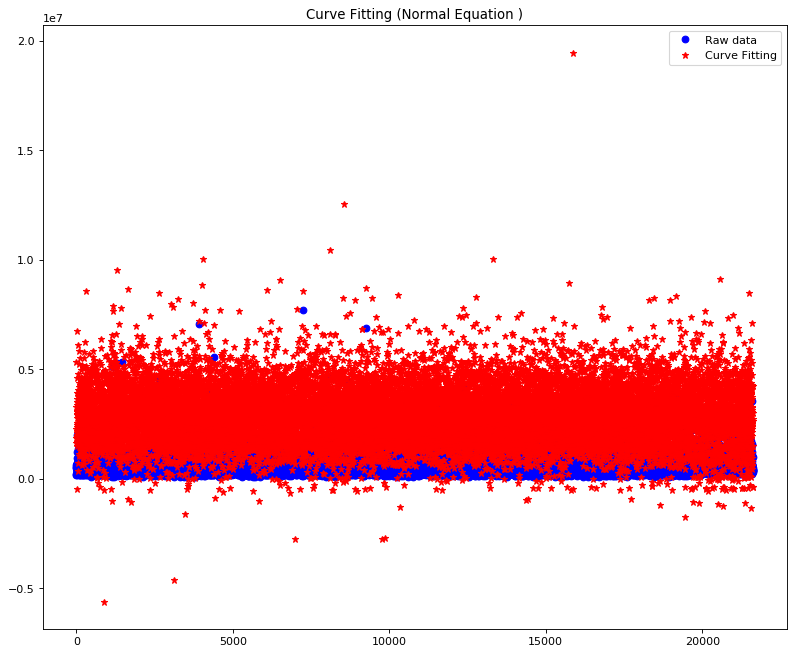

In [18]:
hypothesis = np.dot(x_all, theta)

plt.figure(figsize=(12,10), dpi=80)
t=range(0,y_all.size)
l1,=plt.plot(t,y_all,'ob')
l2,=plt.plot(t,hypothesis,'*r')
plt.title('Curve Fitting (Normal Equation )')
plt.legend((l1,l2),('Raw data','Curve Fitting'), loc = 'best')
plt.savefig('Images\CurveFittingNormalEquation.jpg')
plt.show()
plt.close()
